In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfTransformer
from keras.preprocessing.text import text_to_word_sequence
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC 
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB   
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Prepare data

In [2]:
import sys
sys.path.insert(0, '../preprocessing')
import Preprocessor

In [3]:
X_train, y_train, X_test, y_test = Preprocessor.file_read_vectorizer('../data/TrainingSet.csv', '../data/TestSet.csv')

# 2. Model training

## 2.1. Default hyperparameter values

In [4]:
classifier = LogisticRegression() #default C = 1.0
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.88845


## Hyperparameter tuning
Logistic Regression has one hyperparameter to tune: C i.e. the penalty term. We will choose this hyperparameter based on the Grid Search with Cross-validation schema.

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 5, 50, 100, 150]}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 100}


In [8]:
classifier = LogisticRegression(C = 100, max_iter = 10000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.90395


## 2.3. Model evaluation

In [10]:
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


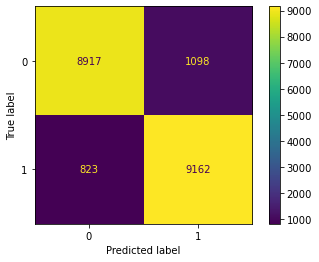

In [14]:
plot_confusion_matrix(classifier, X_test, y_test)  

# 3. Predicting new instances

In [23]:
#positive
sentence = "Was foolishly overthought about watching it at cinemas, due to criticism, but the movie was actually a welcomed change to the previous marvel phase setup, it was not boring at any point for the duration of the movie and it was interesting to see how easily things can go really bad that even Thanos Crusade that was the big deal can seem so simple and trivial.Some comments that i noticed complained about 'not enough multiverse etc etc' the movie was not called Doctor Strange visits any other universe :) the movie played with multiverse and showed some different ways that interacting with one another can have a number of unpredictable results .If someone wants a more deep dive into the theme i suggest to watch Loki series, there its explained and shown in a slower pace with more detailOverall a Solid entry for the Genre, and honestly most of the negative comments and chatter can be applied for the most marvel movies out there if taken serious!"
vec,review_tf = Preprocessor.vectorize_new(sentence)

In [24]:
print(review_tf)

  (0, 2076228)	0.13445214347323473
  (0, 2076225)	0.09894691220652085
  (0, 2070306)	0.13445214347323473
  (0, 2070027)	0.05769710845773085
  (0, 2062473)	0.036420280996354665
  (0, 2058394)	0.032053367439103
  (0, 2052524)	0.13445214347323473
  (0, 2052356)	0.05224557390393417
  (0, 2039859)	0.08582455951199523
  (0, 2001301)	0.08757426666728792
  (0, 1997998)	0.13445214347323473
  (0, 1997883)	0.07550861995628141
  (0, 1901052)	0.08789091415321881
  (0, 1900481)	0.039657263245114815
  (0, 1895362)	0.058632293709226284
  (0, 1865430)	0.12567326826501293
  (0, 1864887)	0.05434127739243571
  (0, 1838152)	0.10593899314736344
  (0, 1837898)	0.06637295383794296
  (0, 1814719)	0.056634559486866305
  (0, 1751042)	0.12053795546969258
  (0, 1749935)	0.044883596967115094
  (0, 1748153)	0.12567326826501293
  (0, 1748055)	0.06417176459198497
  (0, 1737531)	0.11858560015552562
  :	:
  (0, 454309)	0.05936932876894218
  (0, 445877)	0.05734729824308704
  (0, 420917)	0.10351923277257238
  (0, 417181)	

In [25]:
classifier.predict(review_tf)

array([1], dtype=int64)

In [26]:
#negative
sentence2 = "After months of hype, we are left with a mess of a story that is mostly just CGI blobs, some light shows and some boring dialogue. I loved the first Strange movie, its my second favorite after Captain America Winter Soldier. So this was extra disappointing.Firstly, youre not going to have any idea whats going on with the main antagonist unless you watched the Disney+ show Wandavision. Even though I did watch it, it had been months, and I didnt remember all the details, so her whole backstory fell flat. This movie was less about Strange and more about her.Theres also a subplot involving Stranges old flame, but since we only saw them as exes in the previous film, it Didnt really feel that impactful.Theres also an obligatory teen sidekick, which I guess is now standard in the Phase IV fully Disneyized MCU. She might have been interesting, but shes just there as a macguffiin and has no real personality.Theres also random cameos from other Marvel properties, Im beginning to see these bits of crossover fan service are the sole purpose of having a multiverse.Seriously, I dont know why I keep giving my money to this franchise. Black Widow, Eternals, Shang Chi and now Dr Strange 2, have all been dull, uninspired CGI crap fests, that rely entirely on cameos and fan service to keep people coming back. Lets just face it, Hollywood milked all they could from Marvel. Its time to give the franchise ( and maybe all superhero movies)a good 10-15 year rest and reboot it after audiences grow nostalgic."
vec,review_tf = Preprocessor.vectorize_new(sentence2)

In [27]:
print(review_tf)

  (0, 2145971)	0.10171391152869726
  (0, 2137043)	0.03576592961212814
  (0, 2097998)	0.06440116719406086
  (0, 2090850)	0.06639150097695587
  (0, 2088171)	0.03251896597652718
  (0, 2083847)	0.08332611710279487
  (0, 2083829)	0.06718887207445377
  (0, 2061225)	0.03518128921183287
  (0, 2058394)	0.02521151626440657
  (0, 1999123)	0.10575308221202742
  (0, 1998710)	0.0466044114850197
  (0, 1996088)	0.06143775995443715
  (0, 1922179)	0.07946326643195804
  (0, 1920606)	0.02055016460678742
  (0, 1909908)	0.0907697329545184
  (0, 1907871)	0.029605304286174715
  (0, 1880090)	0.052897760033467085
  (0, 1843200)	0.07019403771597225
  (0, 1831213)	0.08099888785615117
  (0, 1831150)	0.06254576978213397
  (0, 1815088)	0.08790389574699986
  (0, 1814719)	0.1336374208117138
  (0, 1811023)	0.0887706874783341
  (0, 1808761)	0.022087388150773865
  (0, 1784577)	0.050789206059926456
  :	:
  (0, 352323)	0.04183074610958787
  (0, 307485)	0.08186567958748542
  (0, 286447)	0.10171391152869726
  (0, 286428)	0.1

In [28]:
classifier.predict(review_tf)

array([0], dtype=int64)